In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import pysr as srp

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [82]:
data_file = 'output.dat'

rho0, rho1, tau0, tau1, jx0, jx1, jy0, jy1, jz0, jz1, sodensx0, sodensx1, sodensy0, sodensy1, sodensz0, sodensz1, spindenx0, spindenx1, \
spindeny0, spindeny1, spindenz0, spindenz1, drhosx0, drhosx1, drhosy, drhosy10, drhosz, drhosz10, rlam0, rlam1 = np.loadtxt( data_file , skiprows=1 , unpack=True)

rho_tot = rho0 + rho1 # x0
tau_tot = tau0 + tau1 # x1

jx_tot = jx0 + jx1
jy_tot = jy0 + jy1
jz_tot = jz0 + jz1

j2 = jx_tot**2 + jy_tot**2 + jz_tot**2 # x2

sodensx_tot = sodensx0 + sodensx1
sodensy_tot = sodensy0 + sodensy1
sodensz_tot = sodensz0 + sodensz1

sodens2 = sodensx_tot**2 + sodensy_tot**2 + sodensz_tot**2 # x3

spindenx_tot = spindenx0 + spindenx1
spindeny_tot = spindeny0 + spindeny1
spindenz_tot = spindenz0 + spindenz1

spinden2 = spindenx_tot**2 + spindeny_tot**2 + spindenz_tot**2 # x4

drhosx_tot = drhosx0 + drhosx1
drhosy_tot = drhosy + drhosy10
drhosz_tot = drhosz + drhosz10

drhos2 = drhosx_tot**2 + drhosy_tot**2 + drhosz_tot**2 # x5

fl = np.column_stack ( ( rho_tot , tau_tot , j2 , sodens2 , spinden2 , drhos2 ) ) # list of features.

rlam_tot = rlam0 + rlam1

In [139]:
csv1 = 'all.func.OotB.hall_of_fame.csv' # csv of out of the box settings with trig, exp, log, low polynomials, etc.
path1 = './outputs/20250326_111431_yP2TOt'
csv2 = 'no.trig.OotB.hall_of_fame.csv' # the above but no trig functions
path2='./outputs/20250326_111751_i9W1Ry'
csv3 = 'no.trig.long.iter.hall_of_fame.csv' # the above but with long iterations
path3 ='./outputs/20250327_002308_RyuCGx'

opl = [ "*" , '+' , '-' , '/' ] # basic arithmetic operators.

uopl= [ "square" , "cbrt" , 'neg' , 'cube','sqrt','inv','exp','log' ] # single input math operations.

#mod1 = pd.read_csv(csv1)
#df2 = pd.read_csv(csv2)
#df3 = pd.read_csv(csv3)

mod1 = srp.PySRRegressor.from_file(run_directory=path1)
#mod2 = srp.PySRRegressor.from_file(run_directory=path2,unary_operators=uopl,operators=opl)
mod3 = srp.PySRRegressor.from_file(run_directory=path3)

Attempting to load model from outputs/20250326_111431_yP2TOt/checkpoint.pkl...
Attempting to load model from outputs/20250327_002308_RyuCGx/checkpoint.pkl...


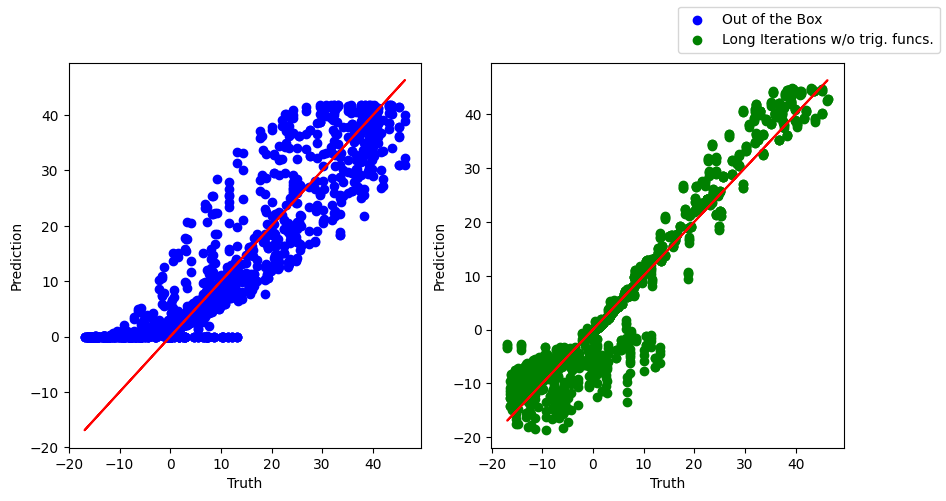

In [166]:
pred1 = mod1.predict(fl)
pred3 = mod3.predict(fl)

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].scatter(rlam_tot,pred1,color='b',label='Out of the Box')
ax[0].plot(rlam_tot,rlam_tot,'r')
ax[0].set_xlabel('Truth')
ax[0].set_ylabel('Prediction')

ax[1].scatter(rlam_tot,pred3,color='g',label='Long Iterations w/o trig. funcs.')
ax[1].plot(rlam_tot,rlam_tot,'r')

ax[1].set_xlabel('Truth')
ax[1].set_ylabel('Prediction');

#fig.tight_layout()
fig.legend();

In [138]:
# dict = {'x0':rho_tot, 'x1':tau_tot, 'x2':j2, 'x3':sodens2, 'x4':spinden2, 'x5':drhos2, 'x6':rlam_tot}
# test_dict = {'x0':0, 'x1':1, 'x2':2, 'x3':3, 'x4':4, 'x5':5, 'x6':6}

# """
# The following code is to test the sympy function with the dictionary to make sure no funny business is going on!
# """

# for i in range ( len(mod1['Equation']) ):

#     sf = sp.sympify(mod1['Equation'][i]) # Sympy Function

#     sf_var = sf.free_symbols # variables in the function, is a set
#     sf_var = list(sf_var) # vonvert to list

#     varl = [] # VARiable List, list of variables' values in the function

#     if len(sf_var) > 0 :
#         for i in range ( len(sf_var) ) :

#             varl.append(test_dict[str(sf_var[i])]) # use sympy variable to get the 
#                                                    # corresponding value from the dictionary

#         val = sf.subs(test_dict).evalf() # substitute the values of the variables in the function
#         print(sf,sf_var,varl,val)


In [137]:
# """
# The following code is to test the sympy function with the dictionary to make sure no funny business is going on!
# """

# for i in range ( len(mod1) ):

#     sf = sp.sympify(mod1['Equation'][i]) # Sympy Function

#     sf_var = list(sf.free_symbols) # variables in the function

#     func = sp.lambdify(sf_var , sf, 'numpy' ) # convert the sympy function to a numpy function

#     var_vals = [ dict[str(var)] for var in sf_var ] # VARiable VALueS, list of variables' values in the function

#     val = func(*var_vals) # substitute the values of the variables in the function
#     print(sf,sf_var,var_vals,val)

#     #if len(sf_var) > 0 :
#     #    for i in range ( len(sf_var) ) :

#     #        varl.append(dict[str(sf_var[i])]) # use sympy variable to get the 
#                                                    # corresponding value from the dictionary

#     #val = sf(test_dict).evalf()
#     #print(val)
#     #print(sf,sf_var,varl,val)
#     #plt.plot(val)


(10000.0, 30000.0)

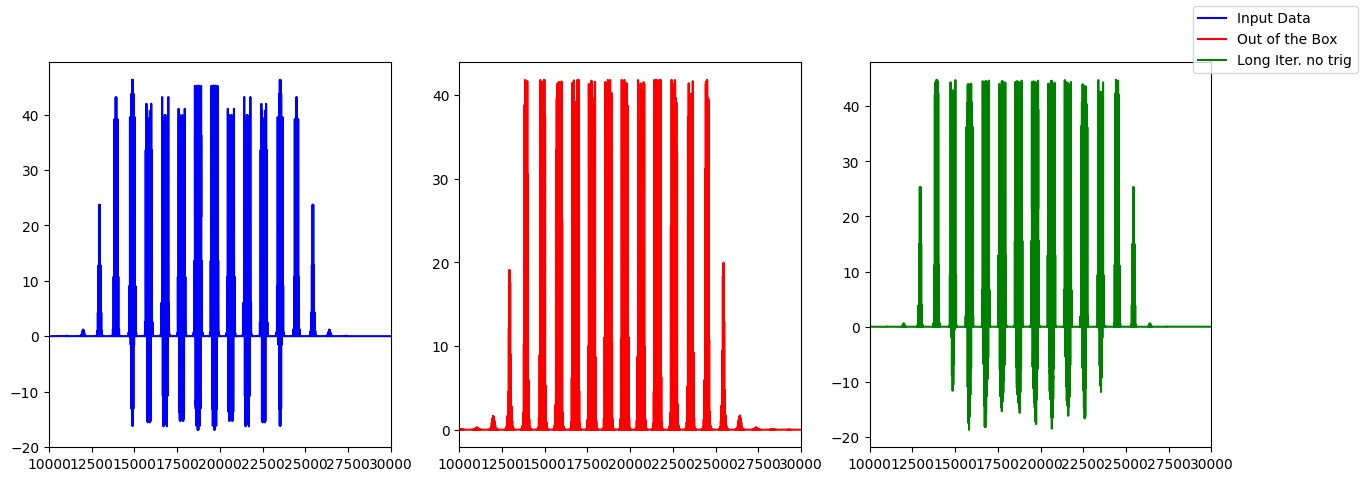

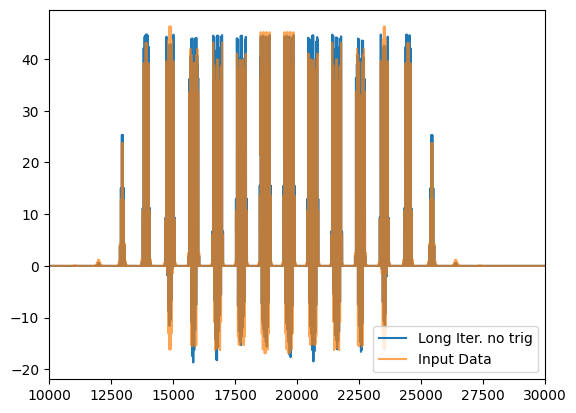

In [127]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(rlam_tot,label='Input Data',color='b')
ax[0].set_xlim(1e4,3e4)
ax[1].plot(pred1,label='Out of the Box',color='r')
ax[1].set_xlim(1e4,3e4)
ax[2].plot(pred3,label='Long Iter. no trig',color='g')
ax[2].set_xlim(1e4,3e4)

fig.legend();

plt.figure()

plt.plot(pred3,label='Long Iter. no trig')
plt.plot(rlam_tot,label='Input Data',alpha=0.7)
plt.legend()

plt.xlim(1e4,3e4)

46.304 -16.9067


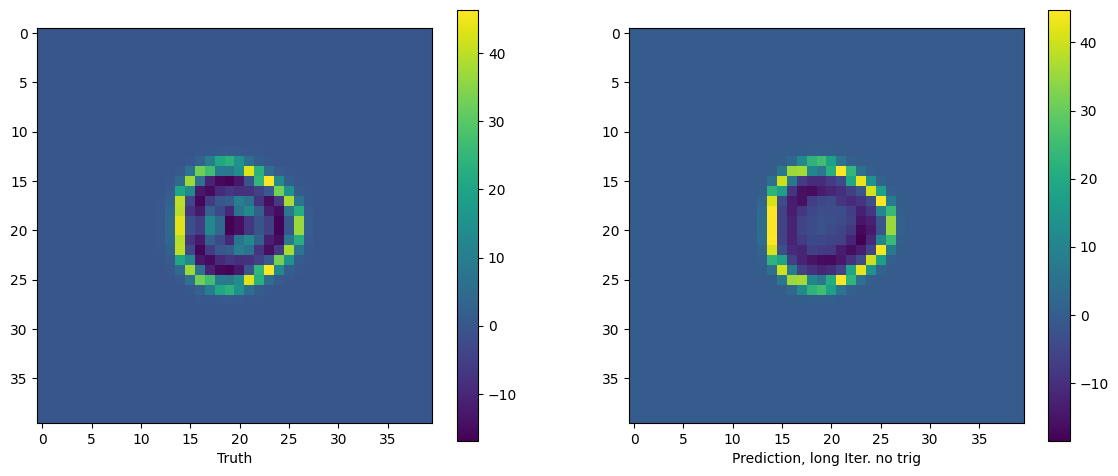

In [169]:
fs = 14
fig,axes = plt.subplots(1,2,figsize=(fs,fs))

rlamtmp = rlam_tot.reshape(40,24,40)
print(max(rlam_tot),min(rlam_tot))
im0 = axes[0].imshow(rlamtmp[:,12,:])


rlamtmp = pred3.reshape(40,24,40)
im1 = axes[1].imshow(rlamtmp[:,12,:])

axes[0].set_xlabel('Truth')
axes[1].set_xlabel('Prediction, long Iter. no trig')

fig.colorbar(im0,ax=axes[0],shrink=0.4)
fig.colorbar(im1,ax=axes[1],shrink=0.4)
plt.show()

In [172]:
with open ('latex_table.txt','w') as file :
    file.write(mod3.latex_table())